# Introduction to Linear Regression 



## Learning Objectives

1. Analyze a Pandas Dataframe
2. Create Seaborn plots for Exporatory Data Analysis 
2. Train a Linear Regression Model using Scikit-Learn


## Introduction 
This lab is in introduction to linear regression using Python and Scikit-Learn.  This lab serves as a foundation for more complex algortithms and machine learning models that you will encounter in the course. We will train a linear regression model to predict housing price.

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/solutions/intro_linear_regression.ipynb) -- try to complete that notebook first before reviewing this solution notebook.

### Import Libraries

In [1]:
!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   

###  Load the Dataset

We will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

Next, we read the dataset into a Pandas dataframe.

In [5]:
df_USAhousing = pd.read_csv('../USA_Housing.csv')

In [6]:
# Show the first five row.

df_USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Let's check for any null values.

In [10]:
df_USAhousing.isnull().sum()
df_USAhousing = df_USAhousing.apply(lambda x : x.fillna(x.value_counts().index[0]))
df_USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
df_USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Let's take a peek at the first and last five rows of the data for all columns.

**Lab Task 1:** Print the first and last five rows of the data for all columns.

In [13]:
# TODO 1 -- your code goes here
df = df_USAhousing
print(df.head())
print(df.tail())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

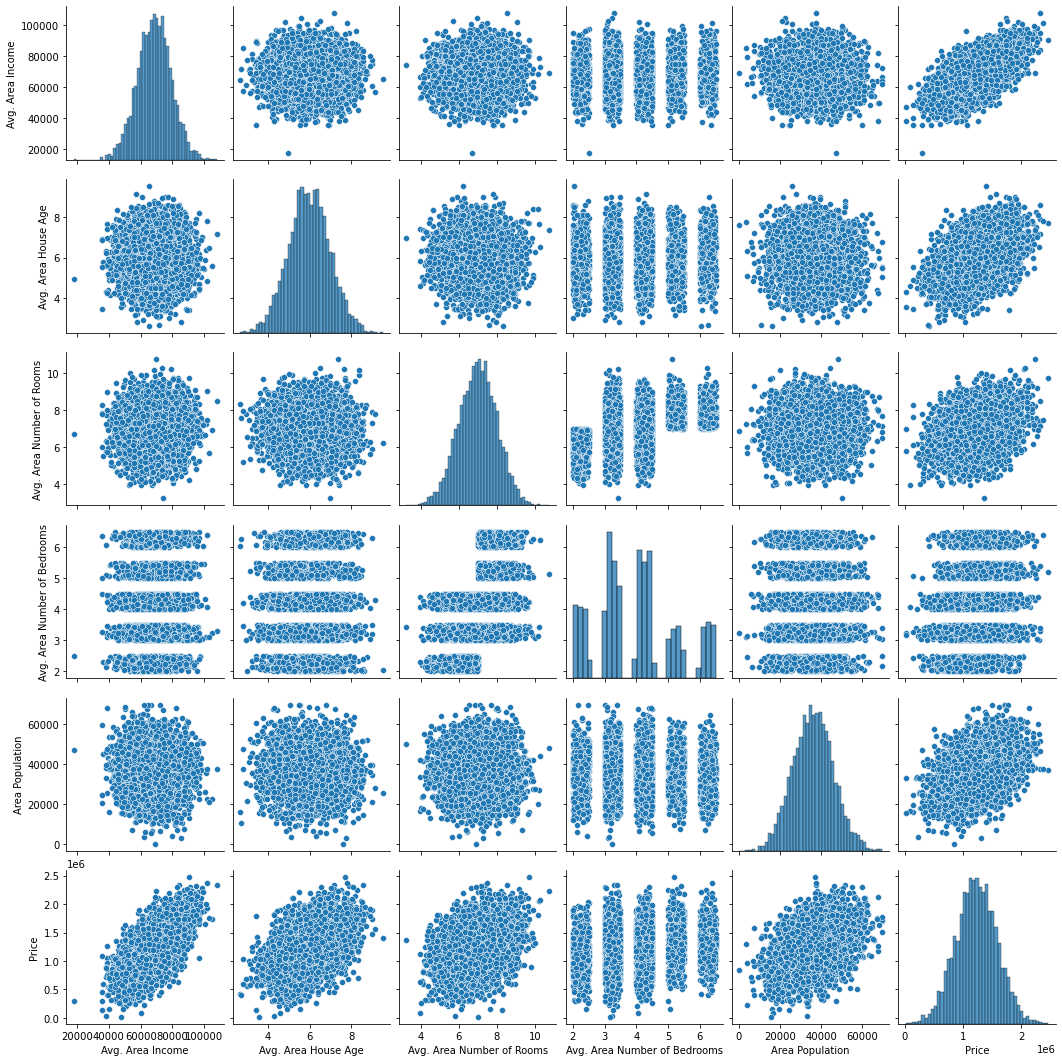

In [14]:
sns.pairplot(df_USAhousing)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

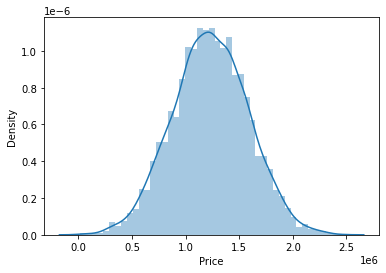

In [17]:
sns.distplot(df_USAhousing['Price'])

**Lab Task 2:** Create the plots using heatmap():

<AxesSubplot:>

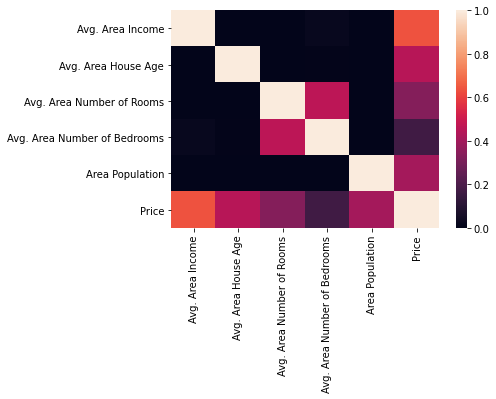

In [19]:
# TODO 2 -- your code goes here
sns.heatmap(df.corr(),vmin = 0,vmax=1)

## Plots using jointplot

In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Jointplot - Avg. Area Income VS Price

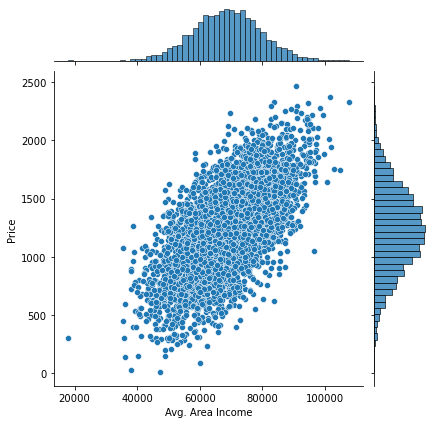

In [22]:
sns.jointplot(data=df,x=df['Avg. Area Income'], y=df['Price'])

## Jointplot - Avg. Area House Age VS Price

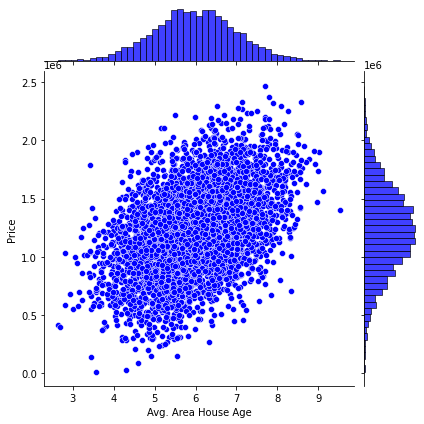

In [26]:
sns.jointplot(data = df, x = df['Avg. Area House Age'], y=df['Price'],color='blue')

## Jointplot- Avg. Area Number of Rooms VS Price

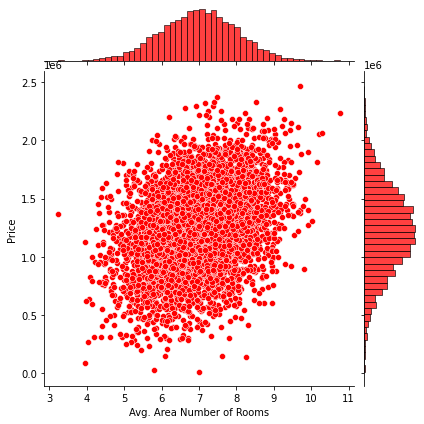

In [28]:
sns.jointplot(data=df, x=df['Avg. Area Number of Rooms'], y=df['Price'],color='red')

## Jointplot- Avg. Area Number of Bedrooms VS Price

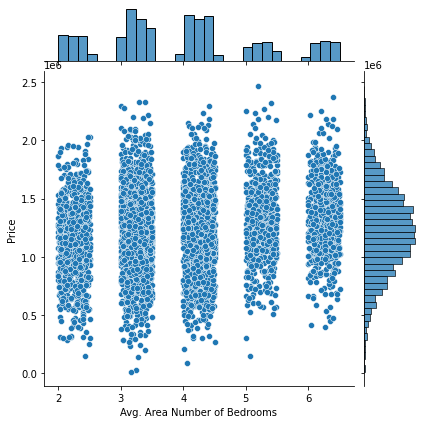

In [29]:
sns.jointplot(data=df, x=df['Avg. Area Number of Bedrooms'], y=df['Price'])

## Jointplot- Area Population VS Price

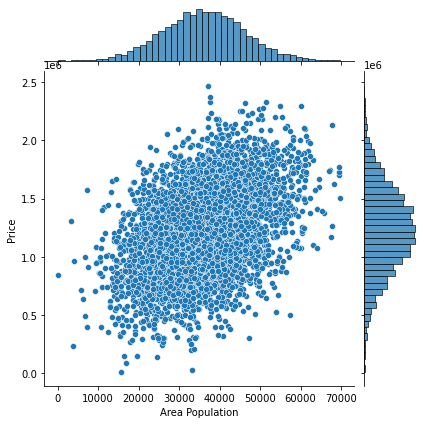

In [30]:
sns.jointplot(data=df, x=df['Area Population'], y=df['Price'])

## Distplot for Area population

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area Population', ylabel='Density'>

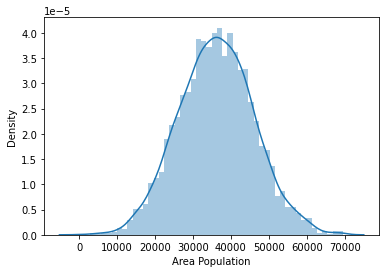

In [77]:
sns.distplot(df['Area Population'], bins=50)

### Heatmap

<AxesSubplot:>

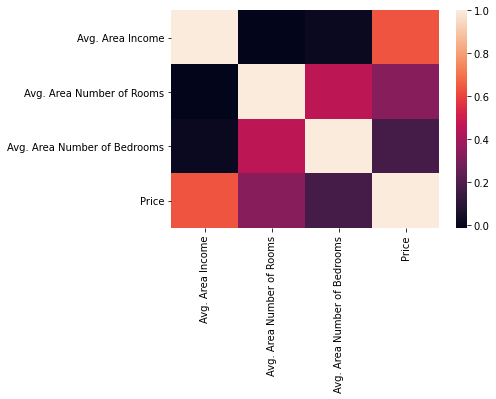

In [87]:
df2 = df[['Avg. Area Income', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Price']]
sns.heatmap(df2.corr())

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, we try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression. 

Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [88]:
X = df_USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df_USAhousing['Price']

## Train - Test - Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.  Note that we are using 40% of the data for testing.  

#### What is Random State? 
If an integer for random state is not specified in the code, then every time the code is executed, a new random value is generated and the train and test datasets will have different values each time.  However, if a fixed value is assigned -- like random_state = 0 or 1 or 101 or any other integer, then no matter how many times you execute your code the result would be the same, e.g. the same values will be in the train and test datasets.  Thus, the random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. 

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
#random_state can be changed 


## Creating and Training the Model

In [58]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

**Lab Task 3:** Training the Model using fit():

In [67]:
# TODO 3 -- your code goes here
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [68]:
# print the intercept
print(lm.intercept_)

-2640159.796853739


In [69]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.



## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [70]:
predictions = lm.predict(X_test)

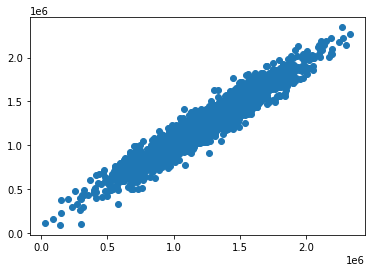

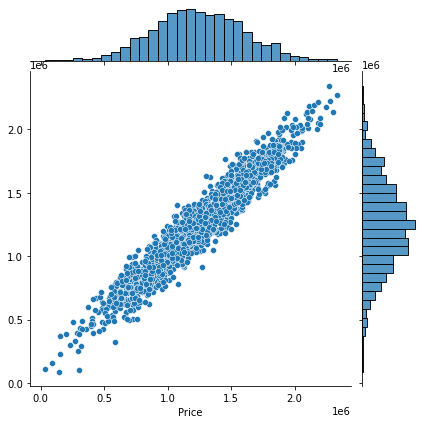

In [71]:
plt.scatter(y_test,predictions,)
sns.jointplot(x=y_test,y=predictions)

**Residual Histogram**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


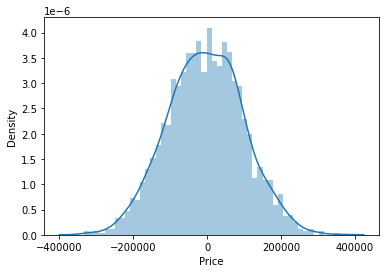

In [72]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [73]:
from sklearn import metrics

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914928
MSE: 10460958907.208244
RMSE: 102278.82922290538


Copyright 2020 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.